<a href="https://colab.research.google.com/github/sourcecode369/TensorFlow-2.0/blob/master/tensorflow_2.0_docs/TensorFlow%20Core/Tutorials/Images/Image%20Segmentation/Kaggle_Nuclei_Image_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%time
!pip install --upgrade tensorflow-gpu

     |████████████████████████████████| 380.8MB 42kB/s 
     |████████████████████████████████| 3.8MB 31.1MB/s 
     |████████████████████████████████| 450kB 43.2MB/s 
     |████████████████████████████████| 81kB 10.6MB/s 
ERROR: tensorflow 1.15.0 has requirement tensorboard<1.16.0,>=1.15.0, but you'll have tensorboard 2.0.1 which is incompatible.
ERROR: tensorflow 1.15.0 has requirement tensorflow-estimator==1.15.1, but you'll have tensorflow-estimator 2.0.1 which is incompatible.
ERROR: tensorboard 2.0.1 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.6.3 which is incompatible.
  Found existing installation: google-auth 1.4.2
    Uninstalling google-auth-1.4.2:
      Successfully uninstalled google-auth-1.4.2
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found exist

CPU times: user 4.86 s, sys: 944 ms, total: 5.81 s
Wall time: 50.2 s


In [2]:
from google.colab import files
files.upload()

!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle 
!chmod 600 ~/.kaggle/kaggle.json 
!kaggle competitions download -c data-science-bowl-2018

Saving kaggle.json to kaggle.json
  0% 0.00/2.62k [00:00<?, ?B/s]
100% 2.62k/2.62k [00:00<00:00, 2.58MB/s]
  0% 0.00/2.67M [00:00<?, ?B/s]
100% 2.67M/2.67M [00:00<00:00, 87.4MB/s]
 66% 6.00M/9.10M [00:00<00:00, 62.7MB/s]
100% 9.10M/9.10M [00:00<00:00, 44.3MB/s]
 82% 65.0M/79.1M [00:02<00:00, 32.0MB/s]
100% 79.1M/79.1M [00:02<00:00, 38.2MB/s]
  0% 0.00/112k [00:00<?, ?B/s]
100% 112k/112k [00:00<00:00, 101MB/s]
 96% 265M/276M [00:05<00:00, 73.4MB/s]
100% 276M/276M [00:05<00:00, 53.8MB/s]
  0% 0.00/386k [00:00<?, ?B/s]
100% 386k/386k [00:00<00:00, 125MB/s]


In [3]:
!ls -GFlash --color

total 368M
4.0K drwxr-xr-x 1 root 4.0K Oct 30 10:30 ./
4.0K drwxr-xr-x 1 root 4.0K Oct 30 10:22 ../
4.0K drwxr-xr-x 1 root 4.0K Oct 28 15:16 .config/
4.0K -rw-r--r-- 1 root   64 Oct 30 10:30 kaggle.json
4.0K drwxr-xr-x 1 root 4.0K Oct 25 16:58 sample_data/
4.0K -rw-r--r-- 1 root 2.7K Oct 30 10:30 stage1_sample_submission.csv.zip
388K -rw-r--r-- 1 root 387K Oct 30 10:30 stage1_solution.csv.zip
9.2M -rw-r--r-- 1 root 9.2M Oct 30 10:30 stage1_test.zip
2.7M -rw-r--r-- 1 root 2.7M Oct 30 10:30 stage1_train_labels.csv.zip
 80M -rw-r--r-- 1 root  80M Oct 30 10:30 stage1_train.zip
116K -rw-r--r-- 1 root 113K Oct 30 10:30 stage2_sample_submission_final.csv.zip
277M -rw-r--r-- 1 root 277M Oct 30 10:30 stage2_test_final.zip


In [0]:
import zipfile
files = ["stage1_train.zip","stage1_train_labels.csv.zip"]
for f in files:
    with zipfile.ZipFile(f, 'r') as zip_ref:
        zip_ref.extractall("stage1_train")

In [5]:
!ls -GFlash --color 
!rm -rf stage1_train.zip
!rm -rf stage1_train_labels.csv.zip
!rm -rf stage1_test.zip
!rm -rf stage1_sample_submission.csv.zip
!rm -rf stage1_solution.csv.zip
!rm -rf stage2_test_final.zip
!rm -rf stage2_sample_submission_final.csv.zip

total 368M
4.0K drwxr-xr-x   1 root 4.0K Oct 30 10:32 ./
4.0K drwxr-xr-x   1 root 4.0K Oct 30 10:22 ../
4.0K drwxr-xr-x   1 root 4.0K Oct 28 15:16 .config/
4.0K -rw-r--r--   1 root   64 Oct 30 10:30 kaggle.json
4.0K drwxr-xr-x   1 root 4.0K Oct 25 16:58 sample_data/
4.0K -rw-r--r--   1 root 2.7K Oct 30 10:30 stage1_sample_submission.csv.zip
388K -rw-r--r--   1 root 387K Oct 30 10:30 stage1_solution.csv.zip
9.2M -rw-r--r--   1 root 9.2M Oct 30 10:30 stage1_test.zip
 76K drwxr-xr-x 672 root  72K Oct 30 10:32 stage1_train/
2.7M -rw-r--r--   1 root 2.7M Oct 30 10:30 stage1_train_labels.csv.zip
 80M -rw-r--r--   1 root  80M Oct 30 10:30 stage1_train.zip
116K -rw-r--r--   1 root 113K Oct 30 10:30 stage2_sample_submission_final.csv.zip
277M -rw-r--r--   1 root 277M Oct 30 10:30 stage2_test_final.zip


In [6]:
%%time
%load_ext tensorboard
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = "retina"

import os
os.environ["PYTHONHASHSEED"] = str(1)

import gc
gc.enable()

import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from cv2 import resize
import seaborn as sns

import tensorflow as tf

from tqdm import tqdm
from itertools import chain
from skimage.io import imread, imshow

CPU times: user 1.85 s, sys: 338 ms, total: 2.19 s
Wall time: 2.72 s


In [0]:
IMG_WIDTH = 128
IMG_HEIGHT = 128
IMG_CHANNELS = 3

DATA_PATH = 'stage1_train/'
seed = 2019

In [0]:
np.random.seed(seed)
tf.random.set_seed(seed)

In [0]:
image_ids = next(os.walk(DATA_PATH))[1]

In [0]:
X = np.zeros((len(image_ids),IMG_HEIGHT,IMG_WIDTH,IMG_CHANNELS), dtype=np.uint8)
Y = np.zeros((len(image_ids),IMG_HEIGHT, IMG_WIDTH,1),dtype=np.bool)

In [11]:
for n, id_ in tqdm(enumerate(image_ids),total=len(image_ids)):
    path = DATA_PATH + id_
    img = imread(path+'/images/'+id_+'.png')[:,:,:IMG_CHANNELS]
    img = resize(img,(IMG_HEIGHT,IMG_WIDTH))
    X[n] = img
    mask = np.zeros((IMG_HEIGHT,IMG_WIDTH,1),dtype=np.bool)
    for mask_file in next(os.walk(path+'/masks/'))[2]:
        mask_ = imread(path + '/masks/' + mask_file)
        mask_ = np.expand_dims(resize(mask_, (IMG_HEIGHT, IMG_WIDTH)), axis=-1)
        mask = np.maximum(mask, mask_)
    Y[n] = mask

100%|██████████| 670/670 [00:43<00:00, 15.33it/s]


In [0]:
x_train = X
y_train = Y

In [13]:
print(f'X_train shape: {x_train.shape}, Y_train shape: {y_train.shape}')

X_train shape: (670, 128, 128, 3), Y_train shape: (670, 128, 128, 1)


![unet](https://i1.wp.com/androidkt.com/wp-content/uploads/2019/04/Selection_062.png?resize=768%2C561&ssl=1)

In [17]:
inputs = tf.keras.layers.Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
s = tf.keras.layers.Lambda(lambda x:x/255.)(inputs)

c1 = tf.keras.layers.Conv2D(16,(3,3),activation=tf.keras.activations.elu, kernel_initializer="he_normal", padding="same")(s)
c1 = tf.keras.layers.Dropout(0.1)(c1)
c1 = tf.keras.layers.Conv2D(16, (3,3), activation=tf.keras.activations.elu, kernel_initializer="he_uniform", padding="same")(c1)
p1 = tf.keras.layers.MaxPooling2D((2,2))(c1)

c2 = tf.keras.layers.Conv2D(32,(3,3),activation=tf.keras.activations.elu, kernel_initializer="he_normal", padding="same")(p1)
c2 = tf.keras.layers.Dropout(0.1)(c2)
c2 = tf.keras.layers.Conv2D(32, (3,3), activation=tf.keras.activations.elu, kernel_initializer="he_uniform", padding="same")(c2)
p2 = tf.keras.layers.MaxPooling2D((2,2))(c2)

c3 = tf.keras.layers.Conv2D(64,(3,3),activation=tf.keras.activations.elu, kernel_initializer="he_normal", padding="same")(p2)
c3 = tf.keras.layers.Dropout(0.2)(c3)
c3 = tf.keras.layers.Conv2D(64, (3,3), activation=tf.keras.activations.elu, kernel_initializer="he_uniform", padding="same")(c3)
p3 = tf.keras.layers.MaxPooling2D((2,2))(c3)

c4 = tf.keras.layers.Conv2D(128,(3,3),activation=tf.keras.activations.elu, kernel_initializer="he_normal", padding="same")(p3)
c4 = tf.keras.layers.Dropout(0.2)(c4)
c4 = tf.keras.layers.Conv2D(128, (3,3), activation=tf.keras.activations.elu, kernel_initializer="he_uniform", padding="same")(c4)
p4 = tf.keras.layers.MaxPooling2D((2,2))(c4)

c5 = tf.keras.layers.Conv2D(256,(3,3),activation=tf.keras.activations.elu, kernel_initializer="he_normal", padding="same")(p4)
c5 = tf.keras.layers.Dropout(0.3)(c5)
c5 = tf.keras.layers.Conv2D(256, (3,3), activation=tf.keras.activations.elu, kernel_initializer="he_uniform", padding="same")(c5)
p5 = tf.keras.layers.MaxPooling2D((2,2))(c5)

u6 = tf.keras.layers.Conv2DTranspose(128, (2,2), strides=(2,2),padding="same")(c5)
u6 = tf.keras.layers.concatenate([u6, c4])
c6 = tf.keras.layers.Conv2D(128, (3,3), activation=tf.keras.activations.elu, kernel_initializer="he_uniform",padding="same")(u6)
c6 = tf.keras.layers.Dropout(0.2)(c6)
c6 = tf.keras.layers.Conv2D(128, (3,3), activation=tf.keras.activations.elu, kernel_initializer="he_uniform",padding='same')(c6)

u7 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
u7 = tf.keras.layers.concatenate([u7, c3])
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation=tf.keras.activations.elu, kernel_initializer='he_normal',padding='same')(u7)
c7 = tf.keras.layers.Dropout(0.2)(c7)
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation=tf.keras.activations.elu, kernel_initializer='he_normal',padding='same')(c7)

u8 = tf.keras.layers.Conv2DTranspose(32, (2,2), strides=(2,2),padding="same")(c7)
u8 = tf.keras.layers.concatenate([u8, c2])
c8 = tf.keras.layers.Conv2D(32, (3,3), activation=tf.keras.activations.elu, kernel_initializer="he_uniform",padding="same")(u8)
c8 = tf.keras.layers.Dropout(0.2)(c8)
c8 = tf.keras.layers.Conv2D(32, (3,3), activation=tf.keras.activations.elu, kernel_initializer="he_uniform",padding='same')(c8)

u9 = tf.keras.layers.Conv2DTranspose(16, (2,2), strides=(2,2),padding="same")(c8)
u9 = tf.keras.layers.concatenate([u9, c1],axis=3)
c9 = tf.keras.layers.Conv2D(16, (3,3), activation=tf.keras.activations.elu, kernel_initializer="he_uniform",padding="same")(u9)
c9 = tf.keras.layers.Dropout(0.2)(c9)
c9 = tf.keras.layers.Conv2D(16, (3,3), activation=tf.keras.activations.elu, kernel_initializer="he_uniform",padding='same')(c9)

outputs = tf.keras.layers.Conv2D(1, (1,1),activation="sigmoid")(c9)

model = tf.keras.Model(inputs, outputs)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss="binary_crossentropy",metrics=["accuracy"])

model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
lambda_3 (Lambda)               (None, 128, 128, 3)  0           input_4[0][0]                    
__________________________________________________________________________________________________
conv2d_36 (Conv2D)              (None, 128, 128, 16) 448         lambda_3[0][0]                   
__________________________________________________________________________________________________
dropout_19 (Dropout)            (None, 128, 128, 16) 0           conv2d_36[0][0]                  
______________________________________________________________________________________________

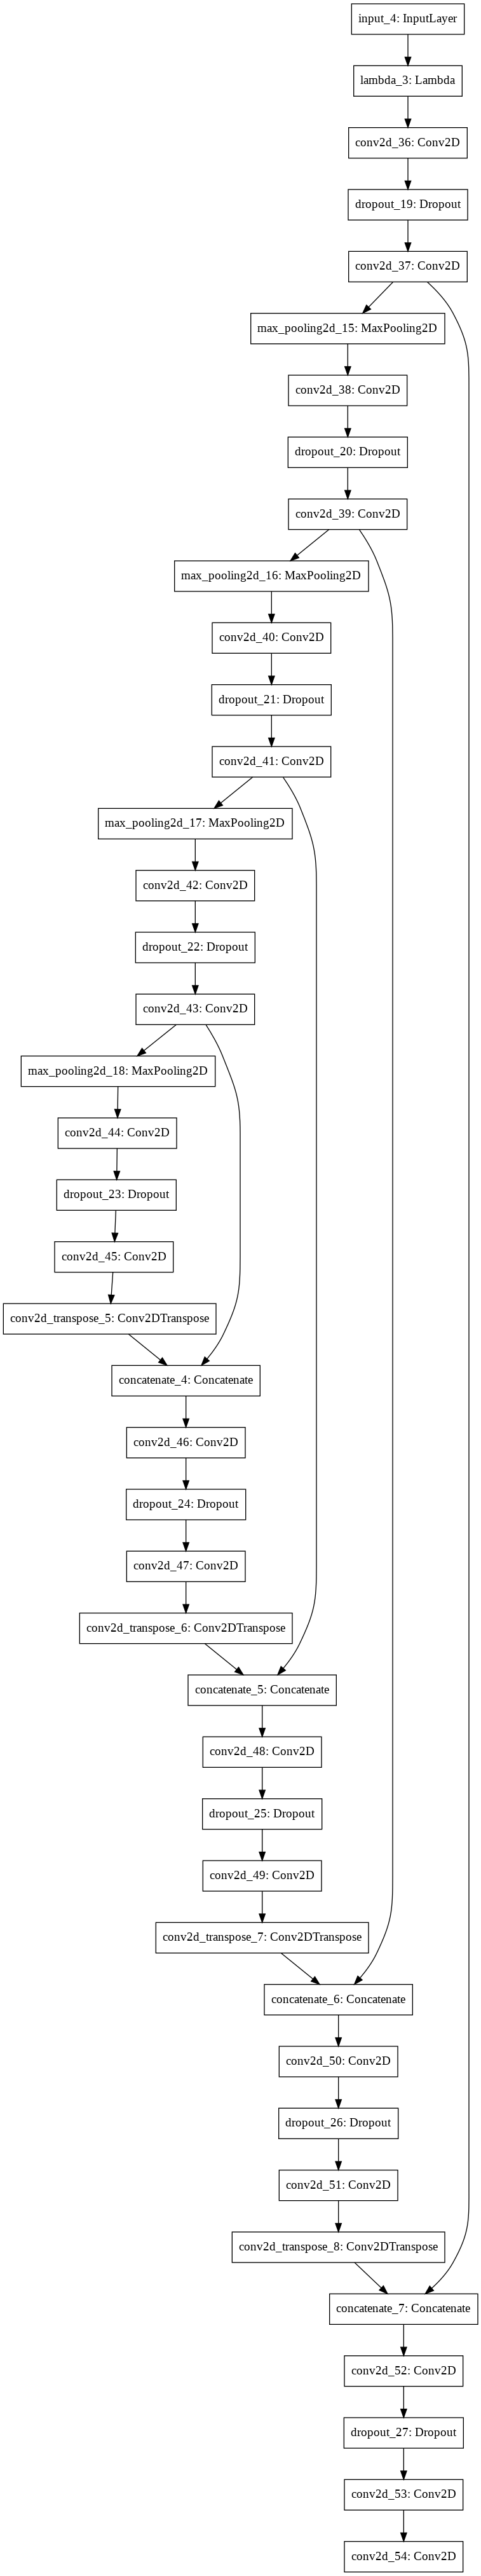

In [18]:
tf.keras.utils.plot_model(model)

In [0]:
checkpoint_path = "{epoch}_unet_checkpoint.h5"

In [0]:
cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                save_weights_only=True,
                                                save_best_only=True,
                                                verbose=1,
                                                monitor="val_acc")

es_callback = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=5,verbose=1)

tb_callback = tf.keras.callbacks.TensorBoard(log_dir = "logs")

def decay(epoch):
    if epoch < 5:
        return 1e-3
    elif epoch >5 and epoch < 10:
        return 1e-4
    else:
        return 1e-5

lr_callback = tf.keras.callbacks.LearningRateScheduler(decay,verbose=1)

callbacks = [
             cp_callback, 
             es_callback,
             tb_callback,
             lr_callback
        ]

In [30]:
model.fit(x_train, 
          y_train, 
          validation_split=0.1, 
          batch_size=16, 
          epochs=15,
          callbacks=callbacks,
          verbose=1)

Train on 603 samples, validate on 67 samples

Epoch 00001: LearningRateScheduler reducing learning rate to 0.001.
Epoch 1/15
603/603 [==============================] - 6s 9ms/sample - loss: 0.1562 - accuracy: 0.9384 - val_loss: 0.1485 - val_accuracy: 0.9428

Epoch 00002: LearningRateScheduler reducing learning rate to 0.001.
Epoch 2/15
603/603 [==============================] - 5s 8ms/sample - loss: 0.1383 - accuracy: 0.9462 - val_loss: 0.1367 - val_accuracy: 0.9450

Epoch 00003: LearningRateScheduler reducing learning rate to 0.001.
Epoch 3/15
603/603 [==============================] - 5s 8ms/sample - loss: 0.1197 - accuracy: 0.9544 - val_loss: 0.1155 - val_accuracy: 0.9545

Epoch 00004: LearningRateScheduler reducing learning rate to 0.001.
Epoch 4/15
603/603 [==============================] - 5s 8ms/sample - loss: 0.1076 - accuracy: 0.9590 - val_loss: 0.1114 - val_accuracy: 0.9551

Epoch 00005: LearningRateScheduler reducing learning rate to 0.001.
Epoch 5/15
603/603 [==============

In [32]:
import random
idx = random.randint(0, len(x_train))
x=np.array(x_train[idx])
x=np.expand_dims(x, axis=0)
predict = model.predict(x, verbose=1)
 
predict = (predict > 0.5).astype(np.uint8)
 
imshow(np.squeeze(predict[0]))
plt.show()
 
imshow(x_train[idx])
 
plt.show()

1/1 [==============================] - 0s 8ms/sample


TypeError: ignored